##### NEREA MARIEZCURRENA MORQUILLAS | MARÍA ÁLVAREZ ALONSO | PEDRO LUIS ASENSIO AMAT
#### Doble grado Economía - Matemáticas y estadística

## Práctica final aprendizaje automático

_Nota_: De cara al planteamiento de la idea, búsqueda de la base de datos ideal, algoritmos abordados y elaboración de código hemos llevado a cabo un régimen de partición de trabajo prácticamente por igual entre las 3 personas que conforman este grupo. Consideramos que expresar en cada apéndice lo elaborado por cada uno podría poner en riesgo una balanza que, bajo cualquier lupa o evaluación, creemos equilibrada. 

# CLASIFICACIÓN DEL ARROZ 

En primer lugar, cargamos las librerías de Python relevantes para la práctica:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import logit, glm, ols
from IPython.display import Image as Im
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


El objetivo principal de nuestro trabajo es el de la elaboración de un trabajo completo de Machine Learning. Para ello, hemos seleccionado de *Kaggle* una base de datos óptima para clasificación binaria sobre granos de arroz. La base de datos es obtenida a través del siguiente enlace: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification?resource=downloadç

Consta de 18185 observaciones con 10 variables relativas a características (que posteriormente serán 8) y otra relativa a la clase de arroz (variable target), esta puede ser Gonen (Clase 0) y Jasmine (Clase 1).

A continuación vamos a proporcionar una breve descripción de las variables 8 que vamos a utilizar para predecir la clase:
- **MayorAxisLength**: Longitud del eje mayor
- **MinorAxisLength**: Longitud del eje menor. En la siguiente imagen vemos que puede ser un buen discriminante.
- **Eccentricity**: Excentricidad (determina la forma del grano de arroz).
- **ConvexArea**: Área convexa.
- **Extent**: Extensión.
- **Perimeter**: Perímetro.
- **Roundness**: Redondez.
- **AspectRation**: Ratio entre la altura y la anchura.

El propósito final es el de poder clasificar de forma correcta el tipo de arroz dadas unas características. Para ello, vamos a emplear algoritmos tanto de aprendizaje supervisado como no supervisado. Finalmente, elaboraremos una métrica o comparativa que sea adecuada de manera que podamos concluir cuál es mejor para nuestro objetivo.

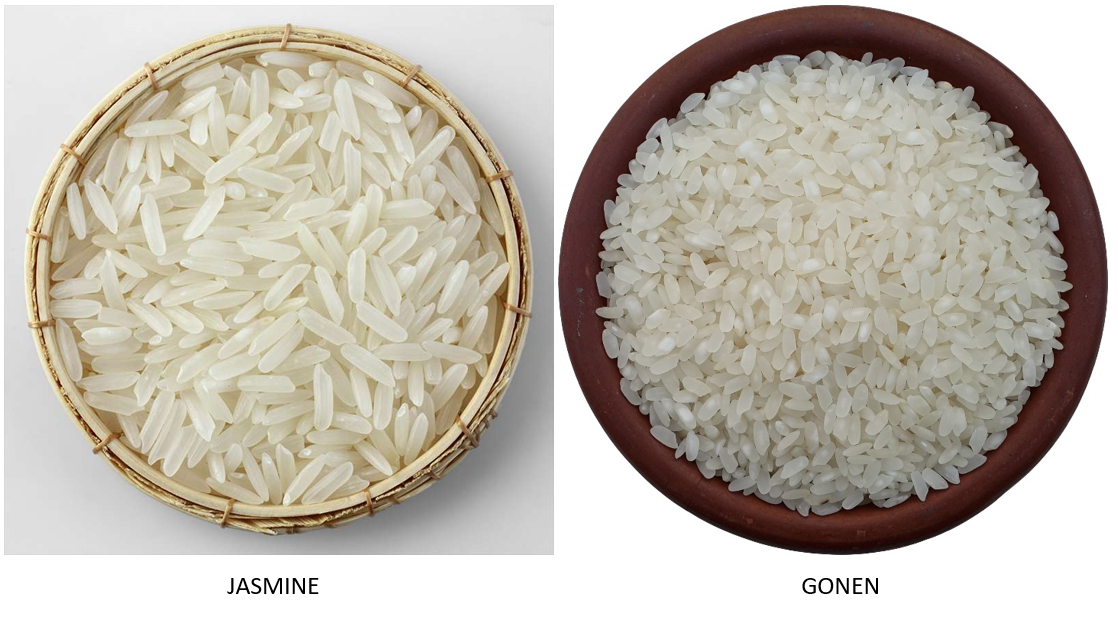

In [3]:
Im("arroz.png")

## 0. Preprocessing 

### Análisis exploratorio

Abrimos el archivo .csv y visualizamos las cinco primeras observaciones del dataframe. Tenemos 12 columnas, de las cuales una es el índice y otra la clase, por lo que tenemos 10 variables relativas a características.

In [4]:
df = pd.read_csv("arroz.csv")

In [5]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


Fijamos ***id*** como el índice  

In [7]:
df=df.set_index("id")

In [8]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


Al hacer el trabajo por primera vez, observamos que varias variables tenían una correlación muy cercana a 1, por lo que decidimos eliminarlas. Dependiendo de la técnica, podría generar muchos problemas

In [9]:
df=df.drop(['Area'],axis=1)
df=df.drop(['EquivDiameter'],axis=1)

In [10]:
df.head(5)

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Roundness,AspectRation,Class
id,,,,,,,,,
1,92.229316,64.012769,0.719916,4677,0.657536,273.085,0.764510,1.440796,1
2,74.691881,51.400454,0.725553,3015,0.713009,208.317,0.831658,1.453137,1
3,76.293164,52.043491,0.731211,3132,0.759153,210.012,0.868434,1.465950,1
4,77.033628,51.928487,0.738639,3157,0.783529,210.657,0.870203,1.483456,1
5,85.124785,56.374021,0.749282,3802,0.769375,230.332,0.874743,1.510000,1


Comprobamos que las clases estén bien balanceadas, hay 9985 observaciones de la Clase 1 y 8200 de la Clase 0. Observamos que el número de elementos en cada clase es muy similar por lo que concluimos que sí

In [11]:
df.Class.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

Al abrir el archivo, observamos que la mayoría de las observaciones pertenecientes a la Clase 1 estaban situadas al principio, por lo que consideramos oportuno llevar a cabo un barajeo

In [12]:
df=df.sample(frac=1,random_state=0).reset_index(drop=True)

De nuevo, visualizamos para comprobar que hay cambios

In [13]:
df.head(5)

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Roundness,AspectRation,Class
0,155.514860,72.570138,0.884445,8961,0.736758,377.195,0.771509,2.142959,0
1,162.040976,78.325844,0.875416,10053,0.596756,399.510,0.770635,2.068806,0
2,147.221136,68.996550,0.883379,8084,0.599985,356.075,0.782986,2.133746,0
3,152.885715,68.969977,0.892463,8420,0.722359,366.087,0.771874,2.216700,0
4,151.815515,53.014781,0.937046,6441,0.645599,350.193,0.634287,2.863645,1


Vemos el número de datos no nulos de cada variable y de qué tipo son, y nos damos cuenta de que no hay datos missings

#### Análisis de valores perdidos y duplicados

In [14]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  18185 non-null  float64
 1   MinorAxisLength  18185 non-null  float64
 2   Eccentricity     18185 non-null  float64
 3   ConvexArea       18185 non-null  int64  
 4   Extent           18185 non-null  float64
 5   Perimeter        18185 non-null  float64
 6   Roundness        18185 non-null  float64
 7   AspectRation     18185 non-null  float64
 8   Class            18185 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.2 MB


MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [15]:
df.isnull()
df.isnull().sum()

MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

No apreciamos valores perdidos, por lo que no hará falta imputarlos de ninguna manera

Actualmente el Dataframe tiene 9 columnas y 18185 filas

In [16]:
df.shape

(18185, 9)

In [17]:
duplicate_rows_df = df[df.duplicated()]
print("numero de duplicados: ", duplicate_rows_df.shape)

numero de duplicados:  (0, 9)


#### Outliers

<AxesSubplot:xlabel='MajorAxisLength'>

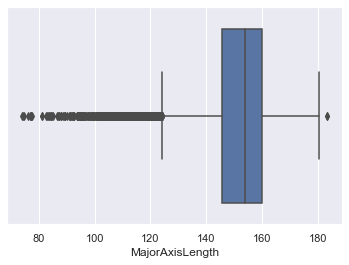

In [18]:
sns.boxplot(x=df['MajorAxisLength'])

<AxesSubplot:xlabel='MinorAxisLength'>

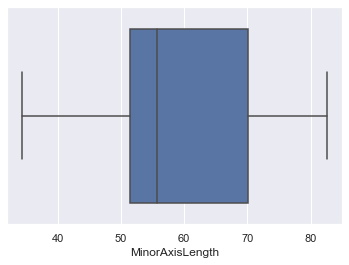

In [19]:
sns.boxplot(x=df['MinorAxisLength'])

<AxesSubplot:xlabel='Eccentricity'>

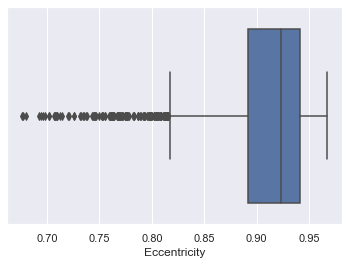

In [20]:
sns.boxplot(x=df['Eccentricity'])

<AxesSubplot:xlabel='ConvexArea'>

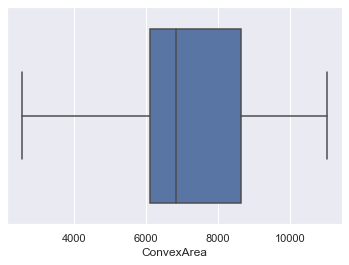

In [21]:
sns.boxplot(x=df['ConvexArea'])

<AxesSubplot:xlabel='Extent'>

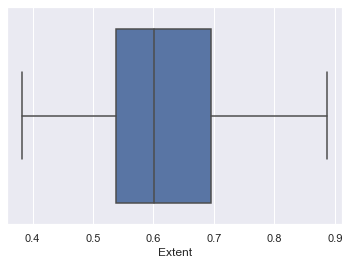

In [22]:
sns.boxplot(x=df['Extent'])

<AxesSubplot:xlabel='Perimeter'>

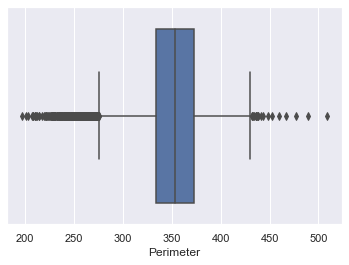

In [23]:
sns.boxplot(x=df['Perimeter'])

<AxesSubplot:xlabel='Roundness'>

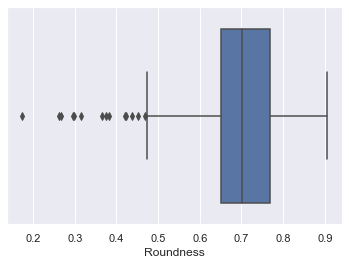

In [24]:
sns.boxplot(x=df['Roundness'])

<AxesSubplot:xlabel='AspectRation'>

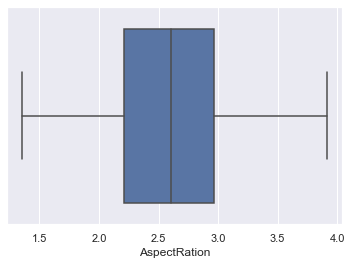

In [25]:
sns.boxplot(x=df['AspectRation'])

En cuanto a los datos outliers, en las variables “MinorAxisLength”, “ConvexArea”, “Extent” y “AspectRation” no cuentan con datos atipicos. En el caso de las variables “Eccentricity” y “Roundless” aparecen outliers en la parte de la izquierda siendo muy numerosos en la primera de las variables. Por otro lado, en “MajorAxisLength” y “Perimeter” se encuentran datos atípicos a ambos lados, en la primera de estas son muy numerosos en la parte de la izquierda y tan solo hay uno a la derecha; mientras que en la segunda, hay varios a ambos lados habiendo bastantes más a la izquierda.

Como algunas observaciones son atípicas para algunas variables, las eliminamos. Esta tarea se puede hacer ya que no afecta demasiado a nuestro trabajo de clasificación binaria. El hecho de que, por el motivo que sea, algunos granos de arroz presenten valores atípicos tanto por ser considerablemente grandes como por pequeños, no va a afectar en absoluto al hecho de que, inexcusablemente, un grano sea Jasmine o Gonen

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MajorAxisLength      14.380304
MinorAxisLength      18.763442
Eccentricity          0.049755
ConvexArea         2520.000000
Extent                0.157135
Perimeter            39.013000
Roundness             0.118318
AspectRation          0.755574
Class                 1.000000
dtype: float64


In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(17607, 9)

Se ha reducido el número de observaciones a 17607

#### Correlaciones 

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Roundness,AspectRation
MajorAxisLength,1.000000,0.281493,0.110555,0.560534,-0.049352,0.842499,-0.117351,0.133993
MinorAxisLength,0.281493,1.000000,-0.914881,0.949982,0.316578,0.728435,0.881534,-0.906516
Eccentricity,0.110555,-0.914881,1.000000,-0.746802,-0.343422,-0.411950,-0.950967,0.977511
ConvexArea,0.560534,0.949982,-0.746802,1.000000,0.256066,0.897367,0.716723,-0.736744
Extent,-0.049352,0.316578,-0.343422,0.256066,1.000000,0.118182,0.364385,-0.348234
Perimeter,0.842499,0.728435,-0.411950,0.897367,0.118182,1.000000,0.344971,-0.391071
Roundness,-0.117351,0.881534,-0.950967,0.716723,0.364385,0.344971,1.000000,-0.959503
AspectRation,0.133993,-0.906516,0.977511,-0.736744,-0.348234,-0.391071,-0.959503,1.000000


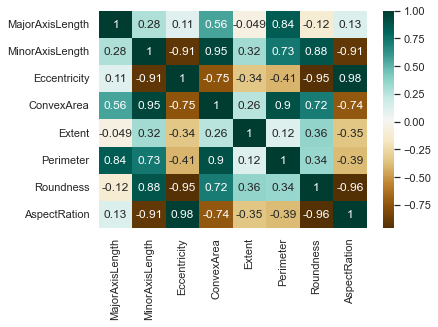

In [28]:
colus =['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'];
correlaciones=df[colus].corr()
sns.heatmap(correlaciones,cmap="BrBG",annot=True)
correlaciones

#### Análisis gráfico 

A continuación, vamos a graficar algunas de las caracteríaticas para conocer en mayor profundidad nuestra base de datos. De manera general, vemos que la cantidad de arroz de la clase Gonen (Clase 0) es menor que la Jasmine (Clase 1).
Sin embargo, se aprecia un balanceo considerablemente bueno para no tener que acudir a otras técnicas.

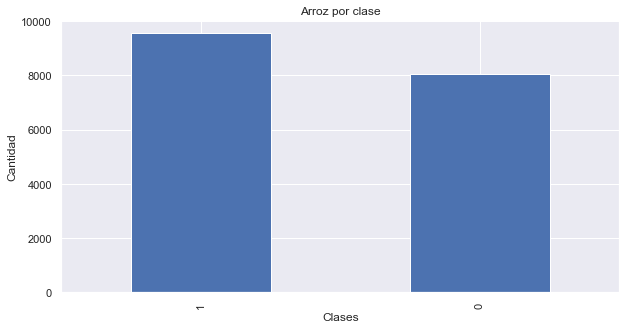

In [29]:
df.Class.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Arroz por clase")
plt.ylabel('Cantidad')
plt.xlabel('Clases');

De igual forma, analizando los estadísticos descriptivos vemos que la variación de cada variable estudiada es diferente pues cada una está medida en unidades diferentes.

Es interesante fijarse en los valores de la media aunque hay que tener en cuanta cómo están distribuidos los valores. Ya que las características que cuentan con bastantes outliers sesgan los valores en la dirección em la que se encuentran gran parte de ellos

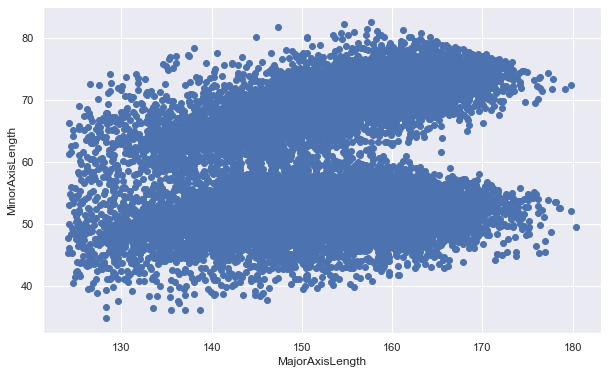

In [30]:
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df["MajorAxisLength"],df["MinorAxisLength"])
ax.set_xlabel("MajorAxisLength")
ax.set_ylabel("MinorAxisLength")
plt.show()

Vemos que podemos separar dos nubes de puntos, lo que nos puede sugerir que cada una de ellas pertece a una clase de arroz. Vemos que cuanto mayor es la longitud del eje mayor mayor es la separación, algunas unidades tienen el eje menor bastante más grande que otros

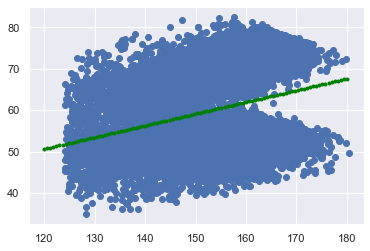

In [31]:
model = LinearRegression(fit_intercept=True)

x=np.array(df.MajorAxisLength)
y=np.array(df.MinorAxisLength)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(120, 180, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='green', marker='o', linestyle='dashed',linewidth=0.5, markersize=3)

De todas formas,vemos que la tendencia es que la longitud del eje menor crece cuanto mayor es el eje mayor.

Otras caracterísitcas que resulta interesante analizarlas conjuntamente son la convexidad, la redondez y la excentricidad. (En matemáticas y geometría la excentricidad es un parámetro que determina el grado de desviación de una sección cónica con respecto a una circunferencia)

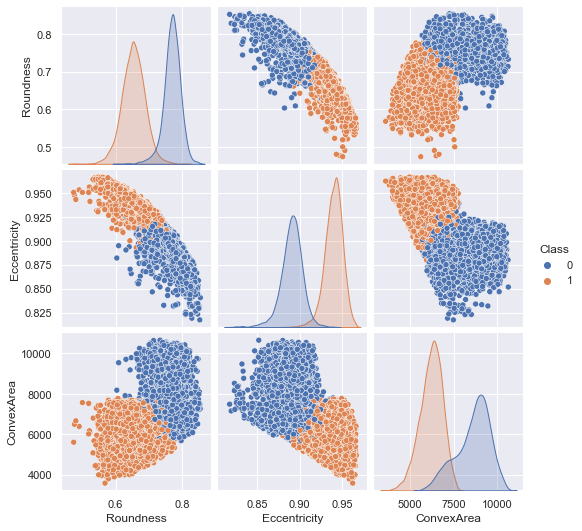

In [32]:
g = sns.pairplot(df,vars=["Roundness","Eccentricity","ConvexArea"],hue="Class")

Fijándonos primeros en los gráficos de la diagonal, vemos como están distribuidas tanto el tipo de arroz Gonen como Jasmine teniendo en cuenta cada característica.

Vemos que tanto en excentricidad y el área convexa las unidades de gonen están distribuidas más a la derecha y que su distribución cuenta con una menor diferencia entre los datos máximos y los mínimos.

Para la redondez se da el caso contrario. En el resto de los graficos, que relaciona características dos a dos vemos que las nubes de puntos están separadas y se van intercambiando posiciones. Por ejemplo el Arroz Gonen tiene mayor redondez y área convexa que el Jasmine. Mientras que esta relación se invierte si hablamos de excentricidad, puesto que aunque el Gonen tenga mayor redondez tiene menor excentricidad.

Aunque aparezcan 6 graficos fuera de las diagonales basta con analizar 3 de ellos, puesto que son simétricos (aunque trasponiendo las relaciones) los de la diagonal superior con la inferior.

## 1. Aprendizaje supervisado

Para la primera parte del trabajo vamos a proponer una serie de algoritmos que nos permitan llevar a cabo aprendizaje supervisado. Entre otros, k-NN o Regresión logística tienen sentido en un problema de clasificación binaria. Es evidente que para un problema de estas características no vamos a llevar a cabo regresión lineal, pues no tendría sentido.

Vamos, lo primero de todo, a separar nuestro conjunto de datos en entrenamiento y test:

### Partición del conjunto en entrenamiento y test

In [33]:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
y = df['Class'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
X_train.shape, X_test.shape

((12324, 8), (5283, 8))

Hemos dividido nuestro conjunto de datos en una proporción 70% train - 30% test. 

### 1.1- k-NN 

El problema de clasificación mediante el método de los primeros vecinos (k-NN), es una técnica popular utilizada en aprendizaje supervisado para clasificar ejemplos no etiquetados en función de su similitud con los ejemplos etiquetados de un conjunto de entrenamiento. Se trata de un modelo no paramétrico de clasificación discriminante, en este caso binario. 
El algoritmo clasifica un ejemplo no etiquetado al buscar los k ejemplos más cercanos en función de una medida de distancia (como la distancia euclidiana) en el espacio de características. Luego, asigna la clase más frecuente entre esos k vecinos al ejemplo no etiquetado.

Vamos a crear un diccionario en el que iremos guardando las precisiones sobre los tests asociados a cada valor k que tomemos para nuestro algoritmo.

In [36]:
accs = {}
ks = list(range(1, 16))

Hacemos el modelo k-NN con 15 parámetros diferentes del número de vecinos entrenandolo cada vez con los datos de entrenamiento y prediciendo sobre los datos de test. Guardamos la precisión asociada a cada modelo asociado al valor k del parámetro

In [37]:
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs[k] = acc

Mostramos el vector de precisiones con cada fila asociada a la precisión del modelo asociado al valor k del número de vecinos

In [38]:
accs

{1: 0.9842892296043915,
 2: 0.9835320840431573,
 3: 0.9871285254590195,
 4: 0.9865606662880939,
 5: 0.9865606662880939,
 6: 0.9861820935074768,
 7: 0.9865606662880939,
 8: 0.9856142343365512,
 9: 0.9856142343365512,
 10: 0.9859928071171683,
 11: 0.9850463751656255,
 12: 0.9854249479462427,
 13: 0.9833427976528487,
 14: 0.9839106568237743,
 15: 0.9818285065303805}

Representamos gráficamente las precisiones para los distintos valores del número de vecinos (k)

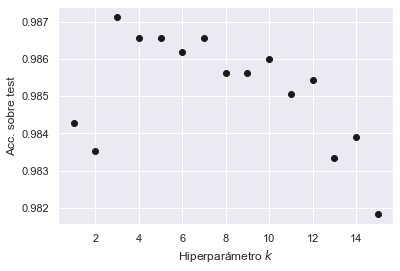

In [39]:
ks_arr = np.fromiter(accs.keys(), dtype=int)
accs_arr = np.fromiter(accs.values(), dtype=float)

plt.plot(ks_arr, accs_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

Vemos la que la mayor precisión se obtiene con un k=3 como es un número impar podemos utilizarlo en el modelo, ya que no hay probabilidad de empate. Luego nuestro modelo óptimo es KNN-3 vecinos

Llevamos a cabo el análisis con el modelo óptimo

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)

Calculamos la precisión de las predicciones del modelo

In [102]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.9871285254590195


Ahora calculamos la matriz de confusiones de la predicción

In [42]:
C = metrics.confusion_matrix(y_test, y_pred)
C

array([[2382,   43],
       [  25, 2833]], dtype=int64)

Esta nos indica que el modelo sobre los datos de test predice 2376 observaciones en la Clase 0, pero de ellas 22 son de la Clase 1. Del mismo modo predice 2836 observaciones de la Clase 1, pero de ellas 49 pertencen a la Clase 0

F-Score: 0.988140913847227


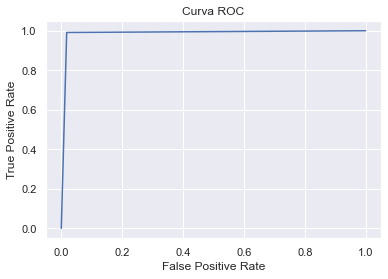

Área bajo la curva (AUC): 0.9867603327249248


In [47]:
y_pred = knn.predict(X_test)

# F-score
f_score_knn = f1_score(y_test, y_pred)
print("F-Score:", f_score_knn)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_knn = roc_auc_score(y_test, y_pred)
print("Área bajo la curva (AUC):", auc_knn)

#### Cross Validation 

Vamos a hacer un estudio de validación cruzada con 5 pariciones y la métrica accuracy para ver cuán bueno es nuestro modelo

Pero antes, barajamos los datos antes de hacer validación cruzada para evitar problemas con los cortes que realiza el modelo

In [43]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [44]:
model= KNeighborsClassifier(n_neighbors=3)
cv=cross_validate(model, X, y, scoring="accuracy", cv=5)
cv

{'fit_time': array([0.02766085, 0.0129993 , 0.01300144, 0.01300025, 0.01299977]),
 'score_time': array([0.07596111, 0.10614753, 0.08992672, 0.06599975, 0.06500006]),
 'test_score': array([0.98921068, 0.98722317, 0.98295939, 0.99062766, 0.98721954])}

In [103]:
accuracy_knn = np.mean(cv['test_score'])
accuracy_knn

0.9874480866887584

Vemos que es un número muy cercano a 1, lo cual nos indica que tiene una precisión muy elevada.

Hacemos el modelo de validación cruzada con 5 particiones y con las métricas R2 y Mean Absolue Error(MAE)

In [45]:
knn = KNeighborsRegressor()

scoring = ['r2', 'neg_mean_absolute_error']

cv = cross_validate(knn, X, y, cv=5, scoring=scoring)

Mostramos los resultados de validación cruzada

In [46]:
cv

{'fit_time': array([0.02284956, 0.01199698, 0.01570344, 0.01561713, 0.0156157 ]),
 'score_time': array([0.01507473, 0.01004863, 0.        , 0.01562619, 0.03118229]),
 'test_r2': array([0.95985621, 0.95668123, 0.95097432, 0.97319663, 0.9639377 ]),
 'test_neg_mean_absolute_error': array([-0.01714935, -0.01766042, -0.01885828, -0.01266686, -0.01550696])}

Calculamos el R2 del modelo

In [47]:
R2 = np.mean(cv['test_r2'])
R2

0.9609292193640318

Calculamos el error medio absoulto del modelo cambiándolo de signo, debido a que las métricas están bajo el convenio de scoring, ya que al ser errorers cuanto más bajo sea mejor

In [48]:
MAE = - np.mean(cv['test_neg_mean_absolute_error'])
MAE

0.016368372066618703

#### Hiperparámetros (k-NN)

In [49]:
model=KNeighborsClassifier()
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Para este apartado vamos a considerar dos hiperparámetros del modelo KNN: el número de vecinos óptimo para el modelo y el parámetro p que es el parámetro de la distancia de Minkowski (si p=1 es la distancia de Manhattan y si p=2 es la euclídea).

Utilizamos una rejilla para calcular el mejor parámetro p, así como el número de vecino óptimos según la métrica R2

In [50]:
ps = np.linspace(1, 2, 10)
ks = list(range(1, 11))
knn = KNeighborsRegressor()

h_parameters = {'p':ps, 'n_neighbors':ks}

cv = GridSearchCV(knn, h_parameters, cv=10, n_jobs=-1, scoring='r2')

cv.fit(X, y)

cv.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1.0)

Vemos que considerando la métrica R2 el número óptimo de vecinos es 9 en lugar de 3 que habíamos obtenido antes con la métrica "accuracy" y el valor óptimo del parámetro p es 1

In [51]:
cv.best_params_

{'n_neighbors': 9, 'p': 1.0}

In [52]:
cv.best_score_

0.9634285130004919

Observamos que la precisión de este modelo es inferior a la que había obtenido antes con 3 vecinos y métrica accuracy

Para poder representar los resultado según el valor de p utilizamos el modelo de KNN para 9 vecinos y buscamos el mejor parámetro para la métrica R2

In [53]:
knn = KNeighborsRegressor(n_neighbors=9)

ps = np.linspace(1, 2, 10)
h_parameters = {'p':ps}

cv = GridSearchCV(knn, h_parameters, cv=10, n_jobs=-1, scoring='r2')


cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=9), n_jobs=-1,
             param_grid={'p': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])},
             scoring='r2')

Obtenemos el mejor estimador

In [54]:
cv.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1.0)

Vemos que el mejor estimador para el parámetro p es 1 como habíamos calculado antes

Mostramos los resultados de validación cruzada

In [55]:
cv.cv_results_

{'mean_fit_time': array([0.03314805, 0.03453178, 0.03172507, 0.03260205, 0.03322468,
        0.0319459 , 0.03465559, 0.03339298, 0.03576257, 0.03617144]),
 'std_fit_time': array([0.00412804, 0.0078575 , 0.00627752, 0.00505844, 0.00881886,
        0.00629635, 0.00389744, 0.00571603, 0.00971459, 0.00526619]),
 'mean_score_time': array([0.01715837, 0.09269152, 0.08132248, 0.08476245, 0.07605994,
        0.08504665, 0.08829741, 0.09002831, 0.08756928, 0.02018008]),
 'std_score_time': array([0.00365096, 0.01050305, 0.00483145, 0.00805141, 0.0079205 ,
        0.00786625, 0.00654107, 0.00724834, 0.01061492, 0.0063763 ]),
 'param_p': masked_array(data=[1.0, 1.1111111111111112, 1.2222222222222223,
                    1.3333333333333333, 1.4444444444444444,
                    1.5555555555555556, 1.6666666666666665,
                    1.7777777777777777, 1.8888888888888888, 2.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
     

Representamos gráficamente la media del test anterior a lo largo de cada partición para el parámetro p

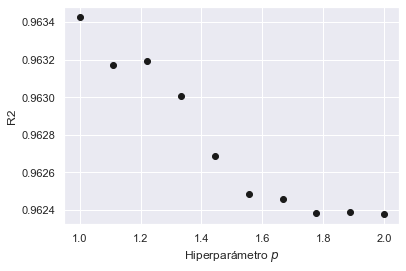

In [56]:
plt.plot(ps, cv.cv_results_['mean_test_score'], 'ok')
plt.xlabel('Hiperparámetro $p$')
plt.ylabel('R2')
plt.grid(True)

Comprobamos que p=1 es el mejor valor del parámetro p

Representamos además +- la desviación típica para obtener gráficamente los intervalos de confianza para le parámetro p

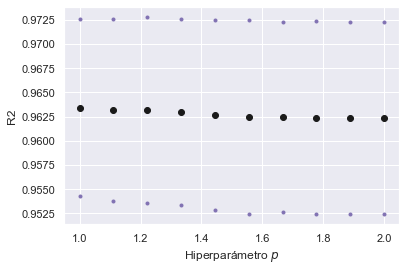

In [57]:
plt.plot(ps, cv.cv_results_['mean_test_score'], 'ok')
plt.plot(ps, cv.cv_results_['mean_test_score'] - cv.cv_results_['std_test_score'], '.m')
plt.plot(ps, cv.cv_results_['mean_test_score'] + cv.cv_results_['std_test_score'], '.m')
plt.xlabel('Hiperparámetro $p$')
plt.ylabel('R2')
plt.grid(True)

Utilizamos una rejilla para calcular el mejor parámetro p, así como el número de vecino óptimos según la métrica MAE

In [58]:
ps = np.linspace(1, 2, 10)
ks = list(range(1, 11))
knn = KNeighborsRegressor()

h_parameters = {'p':ps, 'n_neighbors':ks}

cv = GridSearchCV(knn, h_parameters, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')

cv.fit(X, y)

cv.best_estimator_

KNeighborsRegressor(n_neighbors=1, p=1.0)

Vemos que considerando la métrica MAE el número óptimo de vecinos es 1 y el valor óptimo del parámetro p es 1

In [59]:
-cv.best_score_

0.014426042795932065

Para poder representar los resultados según el valor de p utilizamos el modelo de KNN para 1 vecino y buscamos el mejor parámetro para la métrica MAE

In [60]:
knn = KNeighborsRegressor(n_neighbors=1)

ps = np.linspace(1, 2, 10)
h_parameters = {'p':ps}

cv = GridSearchCV(knn, h_parameters, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')


cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=1), n_jobs=-1,
             param_grid={'p': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])},
             scoring='neg_mean_absolute_error')

Obtenemos el mejor estimador

In [61]:
cv.best_estimator_

KNeighborsRegressor(n_neighbors=1, p=1.0)

Vemos que el mejor estimador para el parámetro p es 1 como habíamos calculado antes

Mostramos los resultados de validación cruzada

In [62]:
cv.cv_results_

{'mean_fit_time': array([0.03532758, 0.03580554, 0.03571372, 0.03524518, 0.03012648,
        0.03477669, 0.03317289, 0.03387418, 0.02855937, 0.03659089]),
 'std_fit_time': array([0.0095947 , 0.00694699, 0.00693049, 0.00974651, 0.00430436,
        0.00590581, 0.00590423, 0.0047397 , 0.00785345, 0.00669328]),
 'mean_score_time': array([0.01016653, 0.06073542, 0.05267498, 0.05159051, 0.05104678,
        0.04928453, 0.04919779, 0.05000176, 0.0587281 , 0.01465273]),
 'std_score_time': array([0.00558729, 0.0137332 , 0.00844722, 0.01037168, 0.00711113,
        0.00604498, 0.0025659 , 0.00609033, 0.00663882, 0.0032031 ]),
 'param_p': masked_array(data=[1.0, 1.1111111111111112, 1.2222222222222223,
                    1.3333333333333333, 1.4444444444444444,
                    1.5555555555555556, 1.6666666666666665,
                    1.7777777777777777, 1.8888888888888888, 2.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
     

Representamos gráficamente la media del test anterior a lo largo de cada partición para el parámetro p

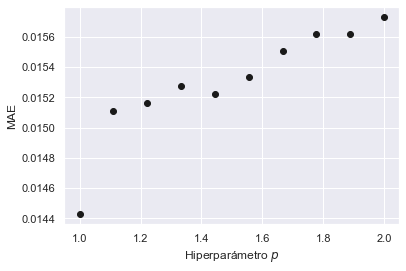

In [63]:
plt.plot(ps, -cv.cv_results_['mean_test_score'], 'ok')
plt.xlabel('Hiperparámetro $p$')
plt.ylabel('MAE')
plt.grid(True)

Gráficamente comprobamos que el p óptimo es 1

Representamos además +- la desviación típica para obtener gráficamente los intervalos de confianza para le parámetro p

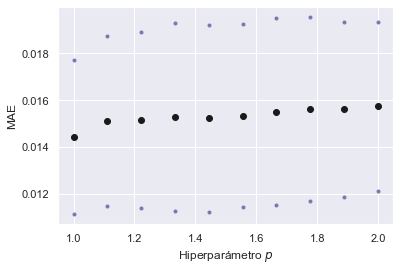

In [64]:
plt.plot(ps, -cv.cv_results_['mean_test_score'], 'ok')
plt.plot(ps, -cv.cv_results_['mean_test_score'] - cv.cv_results_['std_test_score'], '.m')
plt.plot(ps, -cv.cv_results_['mean_test_score'] + cv.cv_results_['std_test_score'], '.m')
plt.xlabel('Hiperparámetro $p$')
plt.ylabel('MAE')
plt.grid(True)

### 1.2- Regresión logística

Otro modelo que podemos emplear para predecir la clase de arroz es la Regresión Logística. Usaremos para el ajuste del modelo statsmodels. Queremos predecir la clase de arroz mediante todas las variables que hemos considerado anteriormente: MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, Perimeter, Roundness y AspectRation

In [48]:
logit_model0 = logit('Class ~ MajorAxisLength + MinorAxisLength + Eccentricity + ConvexArea + Extent + Perimeter + Roundness + AspectRation',df).fit()


Optimization terminated successfully.
         Current function value: 0.028741
         Iterations 15


Mostramos el resumen del modelo de regresión anterior

In [49]:
logit_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                17607
Model:                          Logit   Df Residuals:                    17598
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.9583
Time:                        11:06:04   Log-Likelihood:                -506.05
converged:                       True   LL-Null:                       -12141.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         210.3932     72.171      2.915      0.004      68.941     351.845
MajorAxisLength     1.6740      0.174      9.610      0.000       1.333       2.015
MinorAxisLength    -0.5851      0.408     -1.433      0.152      -1.386       0.215
Eccentricity     -136.0711     56.987     -2.388      0.017    -247.763     -24.379
ConvexArea         -0.0167      0.002     -6.954      0.000      -0.021      -0.012
Extent              0.6762      0.946      0.715      0.474      -1.177       2.529
Perimeter          -0.0884      0.094     -0.941      0.347      -0.272       0.096
Roundness         -77.7045     20.606     -3.771      0.000    -118.091     -37.318
AspectRation      -39.0183      5.155     -7.570      0.000     -49.121     -28.916
===================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

El logaritmo de odds de que un grano de arroz pertenezca a la clase 1 está positivamente relacionado con MajorAxisLength y Extent, sin embargo está negativamente relacionado con el resto de features. Por cada unidad que se incrementa la variable MajorAxisLength, se espera que el logaritmo de odds de Class se incremente en promedio 1,674 unidades (e^(1,674) = 5,33). 

Ahora vamos a calcular la probabilidad de pertenecer a la Clase 1 para nuevos registros de las variables. 

In [50]:
x1 = np.linspace(70, 190, 1000)
x2= np.linspace(34, 85, 1000)
x3=np.linspace(0.6, 1, 1000)
x4=np.linspace(2500, 11000, 1000)
x5=np.linspace(0.3, 0.9, 1000)
x6=np.linspace(190, 510, 1000)
x7=np.linspace(0.1, 1, 1000)
x8=np.linspace(1.3,4,1000)
p = logit_model0.params
eta = p['Intercept']+x1*p['MajorAxisLength']+x2*p['MinorAxisLength']+x3*p['Eccentricity']+x4*p['ConvexArea']+x5*p['Extent']+x6*p['Perimeter']+x7*p['Roundness']+x8*p['AspectRation']
y = np.exp(eta)/(1 + np.exp(eta))

In [51]:
eta

array([ 1.09310555e+02,  1.09082183e+02,  1.08853810e+02,  1.08625438e+02,
        1.08397066e+02,  1.08168693e+02,  1.07940321e+02,  1.07711949e+02,
        1.07483576e+02,  1.07255204e+02,  1.07026832e+02,  1.06798459e+02,
        1.06570087e+02,  1.06341714e+02,  1.06113342e+02,  1.05884970e+02,
        1.05656597e+02,  1.05428225e+02,  1.05199853e+02,  1.04971480e+02,
        1.04743108e+02,  1.04514736e+02,  1.04286363e+02,  1.04057991e+02,
        1.03829619e+02,  1.03601246e+02,  1.03372874e+02,  1.03144502e+02,
        1.02916129e+02,  1.02687757e+02,  1.02459385e+02,  1.02231012e+02,
        1.02002640e+02,  1.01774267e+02,  1.01545895e+02,  1.01317523e+02,
        1.01089150e+02,  1.00860778e+02,  1.00632406e+02,  1.00404033e+02,
        1.00175661e+02,  9.99472887e+01,  9.97189163e+01,  9.94905440e+01,
        9.92621716e+01,  9.90337993e+01,  9.88054269e+01,  9.85770546e+01,
        9.83486822e+01,  9.81203099e+01,  9.78919375e+01,  9.76635652e+01,
        9.74351928e+01,  

Graficamos los datos de probabilidades de cada clase predichas para Extent no observados. Vemos que es muy "vertical" lo que muestra que su coeficiente es elevado y menor que cero 

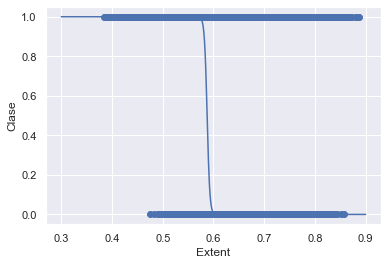

In [52]:
ext, clase = df['Extent'], df['Class']
plt.scatter(ext, clase)
axes=plt.gca() 
plt.xlabel('Extent')
plt.ylabel('Clase')

plt.plot(x5,y)

Con ConvexArea ocurre algo similar

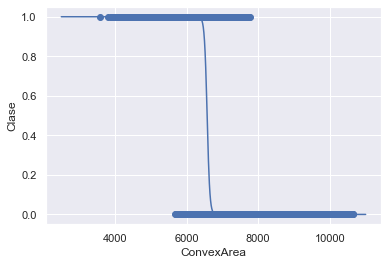

In [53]:
conv, clase = df['ConvexArea'], df['Class']
plt.scatter(conv, clase)
axes=plt.gca() 
plt.xlabel('ConvexArea')
plt.ylabel('Clase')

plt.plot(x4,y)

Podemos interpretar el resultado de la regresión observando el coeficiente de las variables, además de su p-valor. Un aumento del valor de las variables cuyo coeficiente es positivo está asociado con un aumento de las probabilidades de pertenecer a la Clase 1. Con las variables que tienen coeficiente negativo, ocurre lo contrario, un aumento de las mismas está relacionado con una disminución de la probabilidad de pertenecer a la Clase 1. Esto último lo podemos contrastar en el gráfico para ConvexArea, vemos que al aumentar la variable, es mayor la probabilidad de pertenecer a la clase 0. Con Extent no podemos observar lo mismo pues al aumentar su valor, pese a que el coeficiente indique que aumenta la probabilidad de pertenecer a la Clase 1, gráficamente vemos que también hay muchas observaciones con Extent elevado en la Clase 0. El p-valor de esta y otras variables es elevado, por lo que no son significativas y deberíamos eliminarlas, como haremos a continuación

#### Regresión Logística con scikit learn

In [54]:
X= df.drop(columns = "Class")
y= df.Class
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y , random_state = 0,test_size=0.3)

Hacemos las predicciones mediante el modelo de regresión logística que hemos entrenado con los datos de entrenamiento y posteriormente predecimos sobre los de test

In [55]:
model = LogisticRegression(solver='lbfgs',max_iter=10000) 
model.fit(X_train2, y_train2)
predictions = model.predict(X_test2)   

Calculamos la precisión de las predicciones mediante Regresión Logística de los datos de entrenamiento y de los datos de test. Es de esperar que la precisión sea mayor sobre entrenamiento 

In [56]:
accuracyTrain = model.score(X_train2, y_train2)
accuracyTest = model.score(X_test2, y_test2)

print("Accuracy para Entrenamiento: ", accuracyTrain)
print("Accuracy para Test: ", accuracyTest)

Accuracy para Entrenamiento:  0.990506329113924
Accuracy para Test:  0.9888321029717964


Observamos que ambas precisiones son muy elevadas, siendo superior la de los datos de entrenamiento

Calculamos los coeficientes del modelo

In [57]:
model.coef_

array([[ 4.76459270e-02, -5.14212223e-01, -6.75888064e-03,
        -6.67295533e-03, -1.01541557e-02,  2.02171688e-01,
        -1.42053961e-02, -1.39397276e-04]])

Calculamos las predicciones sobre los datos de test y representamos las probabilidades de pertenecer a cada clase de cada dato de test

In [58]:
predicciones = model.predict_proba(X=X_test2)
predicciones = pd.DataFrame(predicciones, columns= model.classes_)
predicciones.head()

,0,1
0,5.737082e-02,0.942629
1,2.159501e-05,0.999978
2,9.034759e-01,0.096524
3,6.559946e-08,1.000000
4,9.999921e-01,0.000008


Vemos que de estas 5 observaciones predice como de la Clase 0 la 2 y la 4 y de la Clase 1 el resto, todas las predicciones tienen probabilidad muy cercana a 1.

Se calculan las predicciones para cada observación de test que se corresponden con la clase a la que tienen mayor probabilidad de pertenecer

In [59]:
predicciones = model.predict(X = X_test2)
predicciones

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

Vamos a obtener los estadísticos y realizar los análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa el modelo 

In [60]:
X_m = sm.add_constant(X_train2) 
logit = sm.Logit(y_train2, X_m)
results = logit.fit()   
results.summary()

Optimization terminated successfully.
         Current function value: 0.027304
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                12324
Model:                          Logit   Df Residuals:                    12315
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.9604
Time:                        11:06:31   Log-Likelihood:                -336.49
converged:                       True   LL-Null:                       -8496.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             213.5932     88.530      2.413      0.016      40.078     387.108
MajorAxisLength     1.6112      0.229      7.030      0.000       1.162       2.060
MinorAxisLength    -0.5987      0.515     -1.162      0.245      -1.609       0.411
Eccentricity     -135.9447     67.666     -2.009      0.045    -268.568      -3.321
ConvexArea         -0.0158      0.003     -5.423      0.000      -0.022      -0.010
Extent              0.0354      1.142      0.031      0.975      -2.203       2.274
Perimeter          -0.0944      0.120     -0.789      0.430      -0.329       0.140
Roundness         -78.0944     25.938     -3.011      0.003    -128.932     -27.257
AspectRation      -37.4947      7.237     -5.181      0.000     -51.678     -23.311
===================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Calculamos el modelo de regresión logística sin las variables ***MinorAxisLength***, ***Extent*** y ***Perimeter*** y mostramos el resumen de este, pues no son significativamente distintos de 0

In [61]:
cols=['MinorAxisLength','Extent','Perimeter']
X_m=X_m.drop(columns=cols)
logit2 = sm.Logit(y_train2, X_m)
results2 = logit2.fit()   

results2.summary()

Optimization terminated successfully.
         Current function value: 0.027377
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                12324
Model:                          Logit   Df Residuals:                    12318
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.9603
Time:                        11:06:35   Log-Likelihood:                -337.39
converged:                       True   LL-Null:                       -8496.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             104.3311     35.596      2.931      0.003      34.565     174.097
MajorAxisLength     1.3935      0.196      7.094      0.000       1.008       1.778
Eccentricity      -73.3850     47.458     -1.546      0.122    -166.401      19.631
ConvexArea         -0.0185      0.002     -8.334      0.000      -0.023      -0.014
Roundness         -58.8172      5.969     -9.854      0.000     -70.516     -47.119
AspectRation      -29.1818      6.342     -4.601      0.000     -41.612     -16.751
===================================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Volvemos a calcular el modelo de regresión logística sin la variable ***Eccentricity*** por el mismo motivo de antes y mostramos el resumen

In [62]:
X_m=X_m.drop(["Eccentricity"],axis=1)
logit3 = sm.Logit(y_train2, X_m)
results3 = logit3.fit()   

results3.summary()

Optimization terminated successfully.
         Current function value: 0.027473
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                12324
Model:                          Logit   Df Residuals:                    12319
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.9602
Time:                        11:06:37   Log-Likelihood:                -338.58
converged:                       True   LL-Null:                       -8496.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              50.0037      6.826      7.325      0.000      36.625      63.383
MajorAxisLength     1.3392      0.169      7.934      0.000       1.008       1.670
ConvexArea         -0.0179      0.002     -9.287      0.000      -0.022      -0.014
Roundness         -58.6340      5.967     -9.827      0.000     -70.329     -46.939
AspectRation      -32.7285      4.980     -6.572      0.000     -42.489     -22.968
===================================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Ahora todas las variables son significativamente distintas de 0 vemos los resultados del modelo.

Calculamos la precisión para los datos de entrenamiento y de test del modelo de regresión logística con las variables ***MajorAxisLength***, ***ConvexArea***, ***Roundness*** y ***AspectRation*** que son las que no han sido eliminadas

In [63]:
colu = ['MajorAxisLength', 'ConvexArea', 'Roundness', 'AspectRation']

X_test_m = sm.add_constant(X_test2[colu])

pred_train = results3.predict(X_m) 

pred_train =  pred_train.apply(lambda x: 1 if x >0.5 else 0)

pred_test = results3.predict(X_test_m)

pred_test =  pred_test.apply(lambda x: 1 if x >0.5 else 0)

accuracyTrain = accuracy_score(y_train2, pred_train )
accuracyTest = accuracy_score(y_test2, pred_test)

print("Accuracy in Training set: ", accuracyTrain)

print("Accuracy in Testing set: ", accuracyTest)

Accuracy in Training set:  0.9909931840311588
Accuracy in Testing set:  0.989778534923339


Se observa que el resultado de la precisión para los datos de entrenamiento es superior al de los datos de test, siendo de nuevo ambos muy cercanos a 1

In [64]:
# Matriz de confusión
cm_lr = confusion_matrix(y_test2, pred_test)
print("Matriz de Confusión:")
print(cm_lr)


Matriz de Confusión:
[[2386   39]
 [  15 2843]]


In [65]:
# F-score
f_score_lr = f1_score(y_test2, pred_test)
print("F-Score:", f_score_lr)

F-Score: 0.9905923344947735


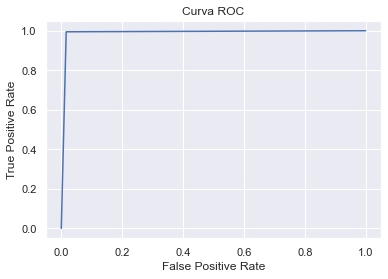

In [66]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test2, pred_test)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

In [67]:
# Área bajo la curva (AUC)
auc_lr = roc_auc_score(y_test2, pred_test)
print("Área bajo la curva (AUC):", auc_lr)

Área bajo la curva (AUC): 0.9893345501504189


Vemos que en la matriz de confusiones un número reducido de observaciones han sido mal clasificadas, además vemos que tiene un F-score muy próximo a 1 lo que nos indica la proximidad hacia un modelo perfecto que tiene tanto alta precisión como alta exhaustividad. Lo mismo sucede con el área bajo la curva que tiene también un valor próximo a la unidado lo que implica que es cadaz de distinguir entre calses positivas y negativas.

#### CV (LR)

Hacemos el modelo por validación cruzada y calculamos la precisón. Si anteriormente ha habido "suerte" al elegir la muestra sobre la que se entrenaba el modelo, de esta manera se va a solventar ese problema


In [85]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [115]:
model=LogisticRegression()
scores_lr = cross_val_score(model, X, y, cv=5).mean()
cv=cross_validate(model, X, y, scoring="accuracy", cv=5)
print("Accuracy in cross validation: ", scores_lr)

Accuracy in cross validation:  0.9899472637687301


#### Hiperparametros (LR)

Vemos qué hiperparámetros tiene sentido considerar en Regresión Logística. Escogemos C, penalty y fit_intercept. Este último especifica si una constante debería ser añadida o no, mientras que penalty es la regularización, en este caso (tras probarlo) nos advierte de que solo es posible que tome l2 o none. L2 estima B's pequeños, controlando el sobreajuste, mientras que none no añade penalty. C reduce el overfitting, cuanto menor sea, mayor es la regularización

In [87]:
modelo=LogisticRegression()
modelo.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [88]:
cts=[True, False]
ps=('l2','none')
cs=range(1,11)
h_parameters= {'fit_intercept': cts, 'penalty':ps, 'C':cs }
cv=GridSearchCV(modelo, h_parameters, cv=5, n_jobs=-1, scoring="accuracy")
cv.fit(X, y)
cv.best_estimator_

LogisticRegression(C=7)

A continuación vemos cuáles son los mejores parámetros para C, fit_intercept y penalty

In [89]:
cv.best_params_

{'C': 7, 'fit_intercept': True, 'penalty': 'l2'}

In [90]:
cv.best_score_

0.9901744719482247

Es muy próxima a 1. Ahora vamos analizar C, considerando que hay intercepto y que penalty = l2

In [91]:
cv.cv_results_

{'mean_fit_time': array([0.11701765, 0.12075233, 0.11100597, 0.10929537, 0.10855527,
        0.11340485, 0.11386518, 0.10711846, 0.11613588, 0.10689249,
        0.11199627, 0.10930438, 0.11304774, 0.12763   , 0.14102073,
        0.13008666, 0.13532996, 0.13812656, 0.13638253, 0.13239527,
        0.14330626, 0.14304433, 0.14724112, 0.14439306, 0.14263611,
        0.14890928, 0.14867015, 0.13663249, 0.13426681, 0.13554277,
        0.13250084, 0.13952909, 0.13390527, 0.14081755, 0.12545314,
        0.1374557 , 0.13820634, 0.13162255, 0.13201151, 0.16932144]),
 'std_fit_time': array([0.02797669, 0.02951647, 0.02536983, 0.01183063, 0.02105659,
        0.01515927, 0.03079856, 0.01629496, 0.02339432, 0.01262289,
        0.01747063, 0.01344905, 0.01546831, 0.01647689, 0.02079231,
        0.01736904, 0.01380735, 0.02023775, 0.0188274 , 0.01748464,
        0.03449026, 0.02014511, 0.02530468, 0.0254713 , 0.02794868,
        0.01955386, 0.01879628, 0.02578095, 0.01958853, 0.01955045,
        0.015

In [92]:
modelo=LogisticRegression(fit_intercept=True, penalty= 'l2',random_state=0)
h_parameters= {'C':cs }
cv=GridSearchCV(modelo, h_parameters, cv=5, n_jobs=-1, scoring="accuracy")
cv.fit(X, y)
cv.best_estimator_

LogisticRegression(C=7, random_state=0)

Gráficamente se observa la mejora en C=7, mientras que C=4 y C=9 empeora

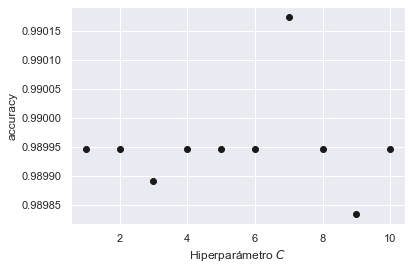

In [93]:
plt.plot(cs, cv.cv_results_['mean_test_score'], 'ok')
plt.xlabel('Hiperparámetro $C$')
plt.ylabel('accuracy')
plt.grid(True)

### 1.3- Árbol de decisión

In [68]:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
y = df["Class"].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Primero vamos a realizar el ajuste con los hiperparámetros que vienen por defecto

In [70]:
arbol = DecisionTreeClassifier(random_state=0)

In [71]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Mediante la función score calculamos la tasa de acierto

In [72]:
arbol.score(X_test,y_test)

0.9816392201400719

Vemos que en este caso el modelo acierto en el 98,14% de los casos, lo que es un dato muy bueno

Otra forma de calcularlo es a través de la realización de predicciones

In [73]:
y_pred = arbol.predict(X_test)
accuracy_score(y_pred,y_test)
arbol.score(X_train,y_train)

1.0

Vemos que en ambos casos llegamos a la misma tasa de acierto. Asimismo, la tasa de acierto en el conjunto de entrenamiento es del 100%

#### Interpretación del árbol

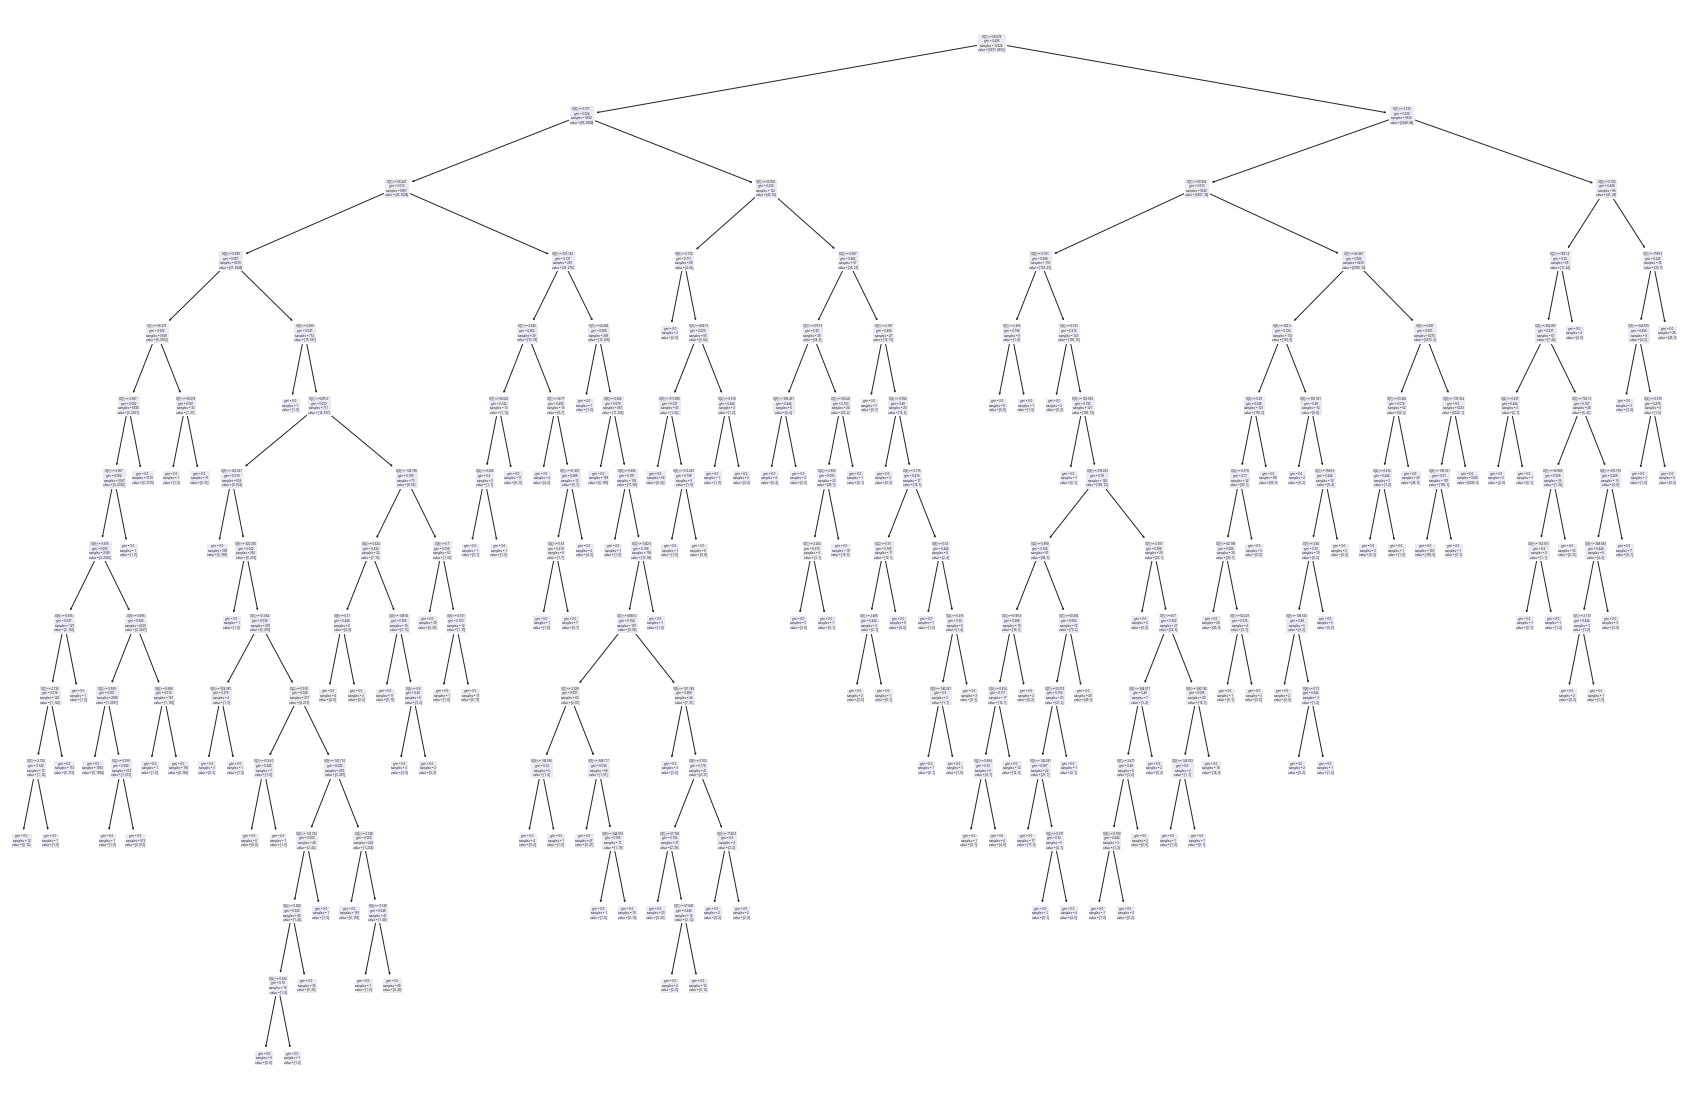

In [100]:
plt.figure(figsize=(30, 20))
tree.plot_tree(arbol);

Vemos que si no configuramos ningún parámetro nos sale un árbol de gran tamaño que parte de un nodo raíz y va dividiéndose en diferentes ramas hasta que al final obtenemos más de 40 nodos terminales. De esta forma es muy difícil llegar a alguna interpretación de manera visual

Calculamos la importancia que tiene cada variable, siendo a mayor uso de la variable mayor la importancia que tenga esta

In [101]:
importancia_predictores = pd.DataFrame(
                            {'predictor': ['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'],
                             'importancia': arbol.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,MinorAxisLength,0.955771
6,Roundness,0.012330
7,AspectRation,0.011933
5,Perimeter,0.005350
3,ConvexArea,0.004546
4,Extent,0.004341
0,MajorAxisLength,0.003489
2,Eccentricity,0.002240


En este cuadro vemos que la longitud del eje menor es la acapara la mayor parte de la importancia, contribuyendo a un 95,5% de reducción de Gini. La siguiente, aunque un tamaño mucho más pequeño, es la excentricidad que contribuye un 1%. El resto de ellas individualmente no alcanza el 1% en su aportación

Representamos gráficamente las importancias para verlo más claro

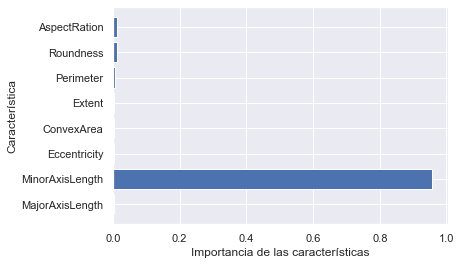

In [102]:
caract=X.shape[1]
plt.barh(range(caract), arbol.feature_importances_)
plt.xlabel('Importancia de las características')
plt.yticks(np.arange(caract),['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'])
plt.ylabel('Característica')
plt.show()

####  CV (Árbol de decisión)

Primero barajeamos los datos para que no haya problemas con los cortes, y a continuación calculamos la precisión

In [113]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [116]:
model=DecisionTreeClassifier()
scores_arb = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
print("Accuracy in cross validation: ", scores_arb)

Accuracy in cross validation:  0.9826208482858023


Tenemos que la tasa de acierto es del 98,26% ligeramente superior que la de nuestro modelo incial

#### Hiperparámetros 

En el caso de los árboles de decisión el hiperparámetro más importante es la profundidad máxima. 

Tal y como hemos visto en nuestro modelo inicial podemos hacer que el árbol creaca hasta que todos los datos de entrenamiento estén separados de manera perfecta, aunque ello puede conducir a errores. 

Así mismo, si obtenemos un árbol de gran tamaño se puede considerar que su validez a la hora de interpretar se reduce puesto que el gran tamaño de este dificulta su interpretación de manera clara y visual

Vamos buscar el mejor parámetro para este modelo y para ello se va a utilizar el error cuadrático medio en vez del criterio de Gini para generar cortes, y se va a dividir el dataset en 15 particiones

In [105]:
param_grid = {'max_depth': list(range(3, 8)) }

cv = GridSearchCV(model, param_grid, n_jobs=-1, scoring='neg_mean_absolute_error', cv=15)
cv.fit(X, y)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7]},
             scoring='neg_mean_absolute_error')

In [106]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=4)

Tenemos que el parámetro óptimo es que la profundidad del árbol sea 4

Repetimos la representación tomando la máxima profundida óptima

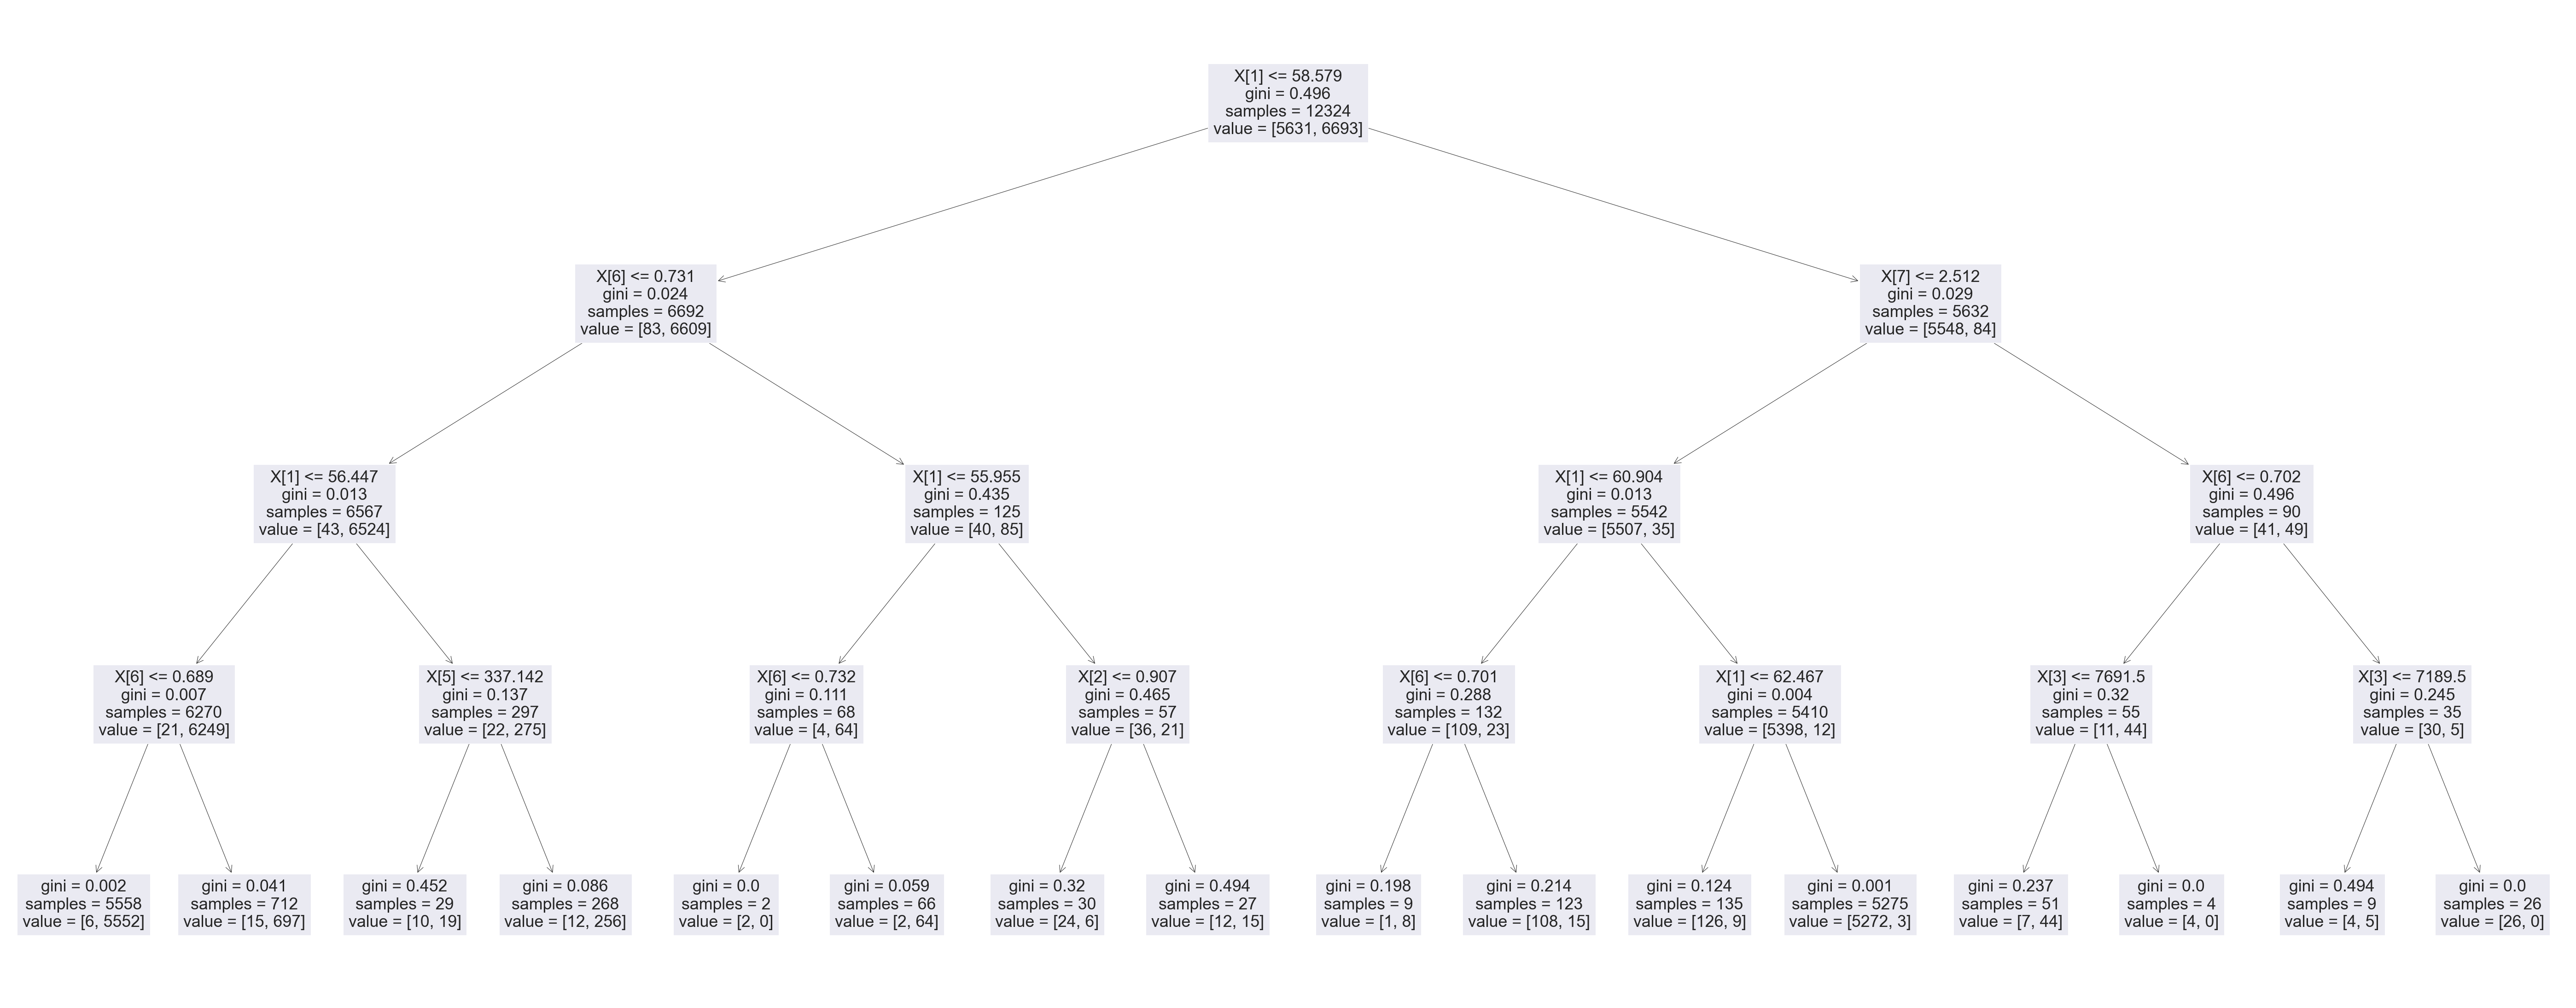

In [76]:
arbol_optimo = DecisionTreeClassifier(max_depth=4)
arbol_optimo.fit(X_train,y_train)
plt.figure(figsize=(100, 40))
tree.plot_tree(arbol_optimo);

El índice de impureza de Gini mide cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. 

Vemos que en cada nodo aparecen diferentes valores, el primero relativo a la característica que tiene que cumplir para saber que camido debe continuar, así como el indice Gini junto con cuántas observaciones hay en cada modelo y qué cantidad de ellas están bien estiquetadas o no

Volvemos a calcular la importancia de las variables

In [108]:
importancia_predictores = pd.DataFrame(
                            {'predictor': ['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'],
                             'importancia': arbol_optimo.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,MinorAxisLength,0.978831
6,Roundness,0.009521
2,Eccentricity,0.008628
3,ConvexArea,0.001623
5,Perimeter,0.000793
7,AspectRation,0.000604
0,MajorAxisLength,0.000000
4,Extent,0.000000


Vemos que la logitud del menor eje sigue siendo con muchísima diferencia el predictor más importante, habiendo aumentado de un 95,5% a casi un 98%

El resto de los parámetros no alcanzan el 1% de importancia, incluso 3 características (la logitud del eje mayor, la medida y el AspectRation) no tienen ningún tipo de relvancia en este caso

Vamos a calcular ahora diferentes medidas de precisión utilizando el árbol de decisión óptimo (max_depth= 4)

Matriz de Confusión:
[[2380   45]
 [  24 2834]]
F-Score: 0.9879728080878507


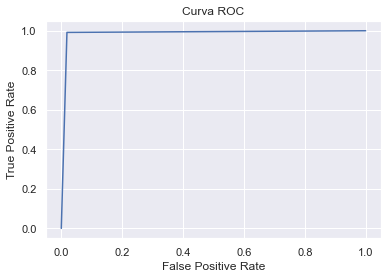

Área bajo la curva (AUC): 0.9865229091066493


In [77]:
y_pred = arbol_optimo.predict(X_test)

# Matriz de confusión
cm_arb = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm_arb)


# F-score
f_score_arb = f1_score(y_test, y_pred)
print("F-Score:", f_score_arb)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_arb = roc_auc_score(y_test, y_pred)
print("Área bajo la curva (AUC):", auc_arb)


Vemos que en la matriz de confusiones hay un número reducido de observaciones que no han sido clasificadas correctamente, además vemos que tiene un F-score muy próximo a 1 lo que nos indica la proximidad hacia un modelo perfecto que tiene tanto alta precisión como alta exhaustividad. Lo mismo sucede con el área bajo la curva que tiene también un valor próximo a la unidado lo que implica que es cadaz de distinguir entre calses positivas y negativas.

### 1.4- Random forest

Continuamos ahora con el álgoritmo random forest.

In [110]:
random = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5)
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [111]:
y_pred = random.predict(X_test)

In [112]:
random.score(X_test,y_test)

0.9890213893621048

In [113]:
importancia_predictores = pd.DataFrame(
                            {'predictor': ['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'],
                             'importancia': random.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,MinorAxisLength,0.304280
2,Eccentricity,0.251300
7,AspectRation,0.148912
6,Roundness,0.131077
3,ConvexArea,0.105146
5,Perimeter,0.040773
4,Extent,0.014680
0,MajorAxisLength,0.003832


Vemos que en este caso son dos características las que destacan frente al resto; MinorAxisLength y Eccentricity tienen una omportancia entre el 25-30% seguidas de AspectRation y Roundness con valores próximos al 15%. Sin embargo, MajorAxisLength y Extent tienen muy poca importancia en comparación con el resto.

####  CV (Random Forest)

Primero barajeamos los datos para que no haya problemas con los cortes y, a continuación, calculamos la precisión.

In [117]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [118]:
model=RandomForestClassifier()
scores_rf = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
print("Accuracy in cross validation: ", scores_rf)

Accuracy in cross validation:  0.9893793239588993


Tenemos que la tasa de acierto es del 98,9%, ligeramente superior que la de nuestro modelo incial

#### Hiperparámetros

A continuación buscamos el valor óptimo para el n_estimator en este algoritmo. Vemos que este valor se alcanza con 301 árboles.

In [116]:
n_arb = list(range(1, 500, 50))
random=  RandomForestClassifier()

h_parameters = {'n_estimators': n_arb}

cv = GridSearchCV(random, h_parameters, cv=10, n_jobs=-1, scoring='r2')

cv.fit(X, y)

cv.best_estimator_

RandomForestClassifier(n_estimators=151)

In [80]:
random1 = RandomForestClassifier(n_estimators=151, random_state=1, max_depth=5)
random1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=151, random_state=1)

Calculemos ahora diferentes medidas para calcular la precisión del modelo.

Matriz de Confusión:
[[2387   38]
 [  20 2838]]
F-Score: 0.9898848971049877


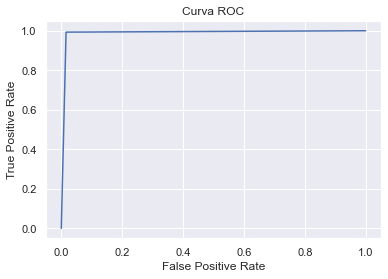

Área bajo la curva (AUC): 0.9886659981387027


In [81]:
y_pred2 = random1.predict(X_test)
# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm_rf)

# F-score
f_score_rf = f1_score(y_test, y_pred2)
print("F-Score:", f_score_rf)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_rf = roc_auc_score(y_test, y_pred2)
print("Área bajo la curva (AUC):", auc_rf)

In [82]:
random1.score(X_test,y_test)

0.9890213893621048

Se observa que la mayoría de los datos están clasificados de manera correcta, únicamente 57 observaciones han sido incluidas en la clase incorrecta. A su vez, cuenta con muy buenos resultados, por un lado alcanza una F_Score de 0,99 (valor muy alto) y tambien, aunque rozando es cantidad, también alcanza casi el 0,99 en el valor del área bajo la curva. 

In [120]:
importancia_predictores = pd.DataFrame(
                            {'predictor': ['MajorAxisLength','MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Roundness','AspectRation'],
                             'importancia': random1.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,MinorAxisLength,0.294576
2,Eccentricity,0.203428
6,Roundness,0.188976
7,AspectRation,0.175782
3,ConvexArea,0.090156
5,Perimeter,0.033540
4,Extent,0.009882
0,MajorAxisLength,0.003660


De igual manera que en el modelo calculado con 100 árboles de decisión, en el caso óptimo (utilzando 301 árboles) se tiene que las variables "MinorAxisLength" y "Eccentricity" son las de mayor importancia, aunque a diferencia del modelo anterior la diferente entre las siguientes dos variables, "Roundness" y "AspectRation" la diferencia es menor. "MayorAxisLength" y "Extent" siguen siendo las variables menos considerables, no alcanzan una imporancia de un 1%.

### 1.5- Bagging

Se utiliza para mejorar la precisión de los modelos predictivos reduciendo la varianza del modelo.

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=tree, n_estimators=10, random_state=0)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [84]:
y_pred = bagging.predict(X_test)

In [85]:
bagging.score(X_test,y_test)

0.9880749574105622

####  CV (Bagging)

Primero barajeamos los datos para que no haya problemas con los cortes y, a continuación, calculamos la precisión.

In [111]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [112]:
model=BaggingClassifier()
scores_bg = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
print("Accuracy in cross validation: ", scores_bg)

Accuracy in cross validation:  0.9878458300251222


En este caso, un accuracy del 0.9887 nos indica que el modelo clasifica correctamente aproximadamente el 98.79% de los datos, que es ligeramente superior que la de nuestro modelo incial.

#### Hiperparámetros

A continuación, buscamos el valor óptimo para el hiperparámetro n_estimator en este algoritmo.

In [127]:
n_arb = list(range(1, 500, 50))
bagging=  BaggingClassifier()

h_parameters = {'n_estimators': n_arb}

cv = GridSearchCV(bagging, h_parameters, cv=10, n_jobs=-1, scoring='r2')

cv.fit(X, y)

cv.best_estimator_

BaggingClassifier(n_estimators=351)

In [86]:
bagging1 = BaggingClassifier(n_estimators=351, random_state=1)
bagging1.fit(X_train, y_train)

BaggingClassifier(n_estimators=351, random_state=1)

Calculemos ahora diferentes medidas para calcular la precisión del modelo.

Matriz de Confusión:
[[2385   40]
 [  21 2837]]
F-Score: 0.9893635571054925


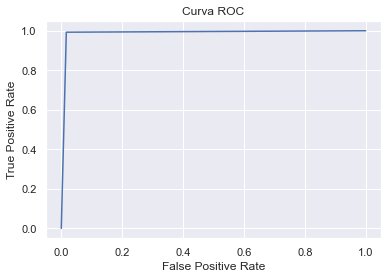

Área bajo la curva (AUC): 0.9880786794889368


In [87]:
y_pred2 = bagging1.predict(X_test)
# Matriz de confusión
cm_bag = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm_bag)

# F-score
f_score_bag = f1_score(y_test, y_pred2)
print("F-Score:", f_score_bag)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_bag = roc_auc_score(y_test, y_pred2)
print("Área bajo la curva (AUC):", auc_bag)

Se observa que la mayoría de los datos están clasificados de manera correcta, únicamente 61 observaciones han sido incluidas en la clase incorrecta. Además, cuenta con muy buenos resultados, ya que, por un lado, un F-Score de 0.989 indica que el modelo tiene un buen equilibrio entre la precisición y la sensibilidad en la clasificacición. Por otro lado, un valor de AUC de 0.988 indica que el modelo tiene un buen rendimiento en términos de clasificación.

### 1.6- Gradient Boost

El algoritmo utiliza un enfoque de optimización basado en el descenso del gradiente, donde se busca minimizar una función de pérdida. La idea principal es reducir gradualmente el error a medida que se construye el modelo, mejorando así la precisión de las predicciones.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=5, random_state=1)

gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, random_state=1)

In [131]:
y_pred = gb.predict(X_test)

In [132]:
gb.score(X_test,y_test)

0.9888321029717964

Vamos a ver el peso que tiene cada variable en este modelo con el algortimo de gradient boost

In [133]:
importances = gb.feature_importances_
features = X.columns.tolist()

importances_df = pd.DataFrame({"feature": features, "importance": importances})
importances_df = importances_df.sort_values(by="importance", ascending=False)

print(importances_df)

           feature  importance
1  MinorAxisLength    0.960744
6        Roundness    0.014212
2     Eccentricity    0.009134
3       ConvexArea    0.004735
4           Extent    0.003199
7     AspectRation    0.003130
5        Perimeter    0.003124
0  MajorAxisLength    0.001722


La característica que tiene un mayor impacto en las predicción del modelo, con un valor de 0.9707, es "MinorAxisLength", indicando que esta característica es muy influyente en las predicciones del modelo. Esta es seguida por "Roundness", "Eccentricity" que, aunque su importancia es menor, todavía juegan un papel relevante en las predicciones. Continuamos con "ConvexArea", "Extent", "AspectRation", "Perimeter" y "MajorAxisLength", donde esta última, al igual que en el resto de modelos, sigue siendo la de menor importancia.

####  CV (Gradient Boost)

In [119]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [120]:
model = GradientBoostingClassifier()
scores_gb = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
print("Accuracy in cross validation: ", scores_gb)

Accuracy in cross validation:  0.9889818064114703


En este caso, un accuracy del 0.989 nos indica que el modelo clasifica correctamente aproximadamente el 98.89% de los datos, que es ligeramente superior que la de nuestro modelo incial.

#### Hiperparámetros

A continuación buscamos el valor óptimo para el hiperparámetro n_estimator en este algoritmo.

In [139]:
n_arb = list(range(1, 500, 50))
gb=  GradientBoostingClassifier()

h_parameters = {'n_estimators': n_arb}

cv = GridSearchCV(gb, h_parameters, cv=10, n_jobs=-1, scoring='r2')

cv.fit(X, y)

cv.best_estimator_

GradientBoostingClassifier(n_estimators=51)

In [90]:
gb1 = GradientBoostingClassifier(n_estimators=51, random_state=1)
gb1.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=51, random_state=1)

Calculemos ahora diferentes medidas para calcular la precisión del modelo.

Matriz de Confusión:
[[2385   40]
 [  22 2836]]
F-Score: 0.9891873038018835


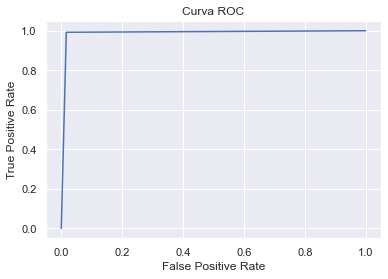

Área bajo la curva (AUC): 0.9879037319731916


In [91]:
y_pred2 = gb1.predict(X_test)
# Matriz de confusión
cm_gb = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm_gb)

# F-score
f_score_gb = f1_score(y_test, y_pred2)
print("F-Score:", f_score_gb)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_gb = roc_auc_score(y_test, y_pred2)
print("Área bajo la curva (AUC):", auc_gb)

Se observa que la mayoría de los datos están clasificados de manera correcta, ya que únicamente 62 observaciones han sido incluidas en la clase incorrecta. Además, cuenta con muy buenos resultados, ya que presenta un F-Score de 0.989 y un valor de AUC de 0.9879, indicando que el modelo tiene un buen rendimiento en la clasificación de nuestros datos.

### 1.7- Xgboost

Continuamos con el algoritmo de XGBoost, que es una implementación de Gradient Boosting que ofrece un rendimiento rápido y preciso en problemas de aprendizaje automático.

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=5, random_state=1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [145]:
y_pred = xgb.predict(X_test)

In [146]:
xgb.score(X_test,y_test)

0.9880749574105622

Vamos a ver el peso que tiene cada variable en este modelo con el algortimo de gradient boost

In [147]:
importances = xgb.feature_importances_
features = X.columns.tolist()

importances_df = pd.DataFrame({"feature": features, "importance": importances})
importances_df = importances_df.sort_values(by="importance", ascending=False)

print(importances_df)

           feature  importance
1  MinorAxisLength    0.935265
2     Eccentricity    0.016831
6        Roundness    0.014709
3       ConvexArea    0.008424
5        Perimeter    0.007090
7     AspectRation    0.006711
4           Extent    0.005875
0  MajorAxisLength    0.005095


Al igual que en los modelos anteriores, la característica que tiene un mayor impacto en las predicción del modelo es "MinorAxisLength", seguida por "Eccentricity" y "Roundness" (presentando estas dos un valor similar), "ConvexArea", "Perimeter", "AspectRation", "Excent" y "MajorAxisLength". Observamos que la importancia que tienen las variables en los diferentes modelos son muy similares.

####  CV (XGradient Boost)

In [121]:
X= df.drop(columns = "Class")
y= df.Class
X, y = shuffle(X, y, random_state=0)

In [122]:
model = XGBClassifier()
scores_xgb = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
print("Accuracy in cross validation: ", scores_xgb)

Accuracy in cross validation:  0.9884137859627341


En este caso, un accuracy del 0.9884 nos indica que el modelo clasifica correctamente aproximadamente el 98.84% de los datos, que continua siendo ligeramente superior que la de nuestro modelo incial.

#### Hiperparámetros

Buscamos el valor óptimo para el hiperparámetro n_estimator en este algoritmo.

In [150]:
n_arb = list(range(1, 500, 50))
xgb=  XGBClassifier()

h_parameters = {'n_estimators': n_arb}

cv = GridSearchCV(xgb, h_parameters, cv=10, n_jobs=-1, scoring='r2')

cv.fit(X, y)

cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=351, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

En este caso, el número de árboles se ha establecido en 351. Además, hay que tener en cuenta que la salida no muestra todos los posibles parámetros y algunos de ellos tienen el valor None, lo que indica que utilizarán los valores predeterminados del algoritmo.

In [93]:
xgb1 = XGBClassifier(n_estimators=351, random_state=1)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=351, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Calculemos ahora diferentes medidas para calcular la precisión del modelo.

Matriz de Confusión:
[[2386   39]
 [  23 2835]]
F-Score: 0.9891835310537334


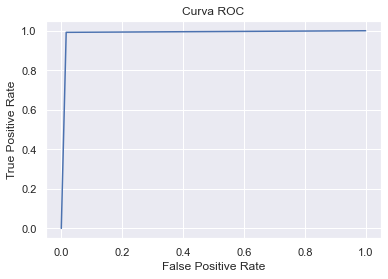

Área bajo la curva (AUC): 0.9879349700244566


In [94]:
y_pred2 = xgb1.predict(X_test)
# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm_xgb)

# F-score
f_score_xgb = f1_score(y_test, y_pred2)
print("F-Score:", f_score_xgb)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva (AUC)
auc_xgb = roc_auc_score(y_test, y_pred2)
print("Área bajo la curva (AUC):", auc_xgb)

Observamos que la mayoría de los datos están clasificados de manera correcta, ya que únicamente 62 observaciones han sido incluidas en la clase incorrecta. Además, cuenta con muy buenos resultados, ya que presenta un F-Score de 0.989 y un valor de AUC de 0.9879, indicando que el modelo tiene un buen rendimiento en la clasificación de nuestros datos.

## 2. Aprendizaje no supervisado

Los algoritmos de clasificación no supervisada en el ámbito del machine learning se utilizan para agrupar datos sin la necesidad de tener etiquetas o clases predefinidas. Estos algoritmos buscan descubrir patrones, estructuras o similitudes intrínsecas en los datos sin la guía de información supervisada.

Por tanto, ya no hará falta separar nuestro conjunto de datos en train y test, sino que serán los propios datos en su totalidad los que vayan dándole la información necesaria al algoritmo.

### K-Means

Agrupa los datos en k clusters tratando de minimizar la varianza dentro de cada cluster. Cada punto se asigna al cluster con el centroide más cercano. Los centroides se van actualizando en cada iteración.

In [153]:
df = pd.read_csv("arroz.csv")

In [154]:
df=df.drop(['id', 'Class'],axis=1)

In [155]:
df=df.drop(['Area'],axis=1)
df=df.drop(['EquivDiameter'],axis=1)

In [156]:
# Obtener las muestras como una matriz numpy
dataset = df.values

# Crear el modelo de clustering K-means
k = 2  # Número de clusters deseados
kmeans = KMeans(n_clusters=k)

# Entrenar el modelo con el conjunto de datos
kmeans.fit(dataset)

# Obtener las etiquetas de los clusters asignados a cada muestra
etiquetas = kmeans.labels_

# Obtener las coordenadas de los centroides
centroides = kmeans.cluster_centers_

# Agregar las etiquetas y los centroides al DataFrame
df['Cluster'] = etiquetas
df_centroides = pd.DataFrame(centroides, columns=['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Roundness', 'AspectRation'])
df_centroides['Cluster'] = ['Centroide 1', 'Centroide 2']

# Imprimir los resultados
print("DataFrame con etiquetas de los clusters:")
print(df)
print("\nDataFrame con coordenadas de los centroides:")
print(df_centroides)

DataFrame con etiquetas de los clusters:
       MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea    Extent  \
0            92.229316        64.012769      0.719916        4677  0.657536   
1            74.691881        51.400454      0.725553        3015  0.713009   
2            76.293164        52.043491      0.731211        3132  0.759153   
3            77.033628        51.928487      0.738639        3157  0.783529   
4            85.124785        56.374021      0.749282        3802  0.769375   
...                ...              ...           ...         ...       ...   
18180       148.624571        51.029281      0.939210        6008  0.498594   
18181       169.593996        58.141659      0.939398        7806  0.647461   
18182       154.777085        52.908085      0.939760        6531  0.561287   
18183       151.397924        51.474600      0.940427        6189  0.492399   
18184       153.081981        51.590606      0.941500        6283  0.489975   

       Per

#### Representación gráfica de algunos clústers

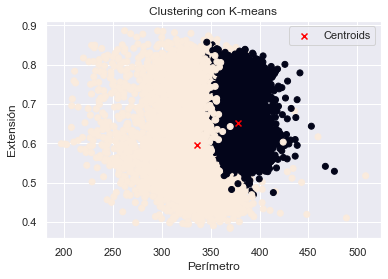

In [157]:
plt.scatter(df['Perimeter'], df['Extent'], c=etiquetas)
plt.scatter(df_centroides['Perimeter'], df_centroides['Extent'], marker='x', color='red', label='Centroids')
plt.xlabel('Perímetro')
plt.ylabel('Extensión')
plt.title('Clustering con K-means')
plt.legend()
plt.show()

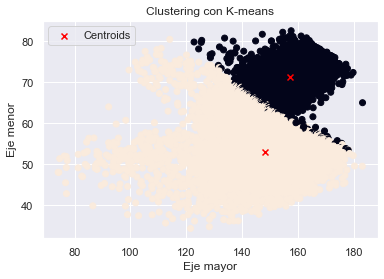

In [158]:
plt.scatter(df['MajorAxisLength'], df['MinorAxisLength'], c=etiquetas)
plt.scatter(df_centroides['MajorAxisLength'], df_centroides['MinorAxisLength'], marker='x', color='red', label='Centroids')
plt.xlabel('Eje mayor')
plt.ylabel('Eje menor')
plt.title('Clustering con K-means')
plt.legend()
plt.show()

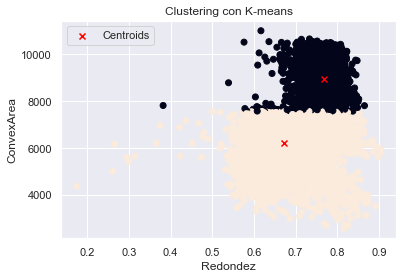

In [159]:
plt.scatter(df['Roundness'], df['ConvexArea'], c=etiquetas)
plt.scatter(df_centroides['Roundness'], df_centroides['ConvexArea'], marker='x', color='red', label='Centroids')
plt.xlabel('Redondez')
plt.ylabel('ConvexArea')
plt.title('Clustering con K-means')
plt.legend()
plt.show()

## 3. Comparativa de algoritmos

A lo largo de este trabajo se han utilizado diferentes métricas para evaluar cada algoritmo. Dentro del aprendizaje supervisado han sido 6 los algortimos estudiados, con diferentes parámetros, buscando siempre el óptimo que nos proporciene el mejor resultado.

Se han estudiado la precisión de los modelos con medidas como la f1_score, el área bajo la curva, la curva ROC o el accuracy score. También se ha ilustrado la matriz de confusión. El objetivo de todas estas medidas es ver como de bien se ajusta el modelo a los datos reales, se quiere evaluar la similitud entre los valores predichos y los reales.

A continuación vamos a realizar una comparación entre métodos utilizando 3 medidas, la F-SCORE, el área bajo la curva y la accuracy. 

In [127]:
medidas = pd.DataFrame( {'algoritmo': ["Regresión logistica", "Árboles de decisión", "Gradient Boost", "XGBOOST", "Bagging", "Random forest", "KNN"],
                             'F1-SCORE':[f_score_lr, f_score_arb, f_score_gb, f_score_xgb, f_score_bag, f_score_rf, f_score_knn,]}
                            )
medidas.sort_values("F1-SCORE", ascending=False)

,algoritmo,F1-SCORE
0,Regresión logistica,0.990592
5,Random forest,0.989885
4,Bagging,0.989364
2,Gradient Boost,0.989187
3,XGBOOST,0.989184
6,KNN,0.988141
1,Árboles de decisión,0.987973


La puntuación F1 puede interpretarse como una media armónica de la precisión y la exhaustividad (recall), donde una puntuación F1 alcanza su mejor valor en 1 y el peor en 0. Vemos que todos los algortimos ofrecen puntucaciones muy altas, el menor valor esta situado en 0.9879 con una diferencia de menos de 0.003 entre él y el mejor de los resultados.

La regresión logística es el algoritmo que mayor valor alcanza seguida de Random Forest y Bagging con una diferencia mínima entre ellos. El peor de los resutados es el ofrecido por los Árboles de decisión, aunque no está muy lejos de los demás.

In [125]:
medidas = pd.DataFrame( {'algoritmo': ["Regresión logistica", "Árboles de decisión", "Gradient Boost", "XGBOOST", "Bagging", "Random forest", "KNN"],
                             "Área bajo la curva":[auc_lr, auc_arb, auc_gb, auc_xgb, auc_bag, auc_rf, auc_knn,]}
                            )
medidas.sort_values("Área bajo la curva", ascending=False)

,algoritmo,Área bajo la curva
0,Regresión logistica,0.989335
5,Random forest,0.988666
4,Bagging,0.988079
3,XGBOOST,0.987935
2,Gradient Boost,0.987904
6,KNN,0.986760
1,Árboles de decisión,0.986523


La métrica de evaluación AUC se calcula como el área bajo una curva ROC y es una medida del rendimiento esperado de un clasificador. El AUC se sitúa siempre entre 0 y 1, y cuanto más alto es el valor, mejor es el clasificador.

Se observa que según este criterio todos los algoritmos serían modelos adecuados para el uso, puesto que ofrecen valores muy próximos al 1. Además la diferencia entre todos ellos es muy pequeña, la diferencia en entre el que ofrece los mejores resultados y el últmio es menor que 0,003. 

In [126]:
medidas = pd.DataFrame( {'algoritmo': ["Regresión logistica", "Árboles de decisión", "Gradient Boost", "XGBOOST", "Bagging", "Random forest", "KNN"],
                             "Accuracy":[scores_lr, scores_arb, scores_gb, scores_xgb, scores_bg, scores_rf, accuracy_knn,]}
                            )
medidas.sort_values("Accuracy", ascending=False)

,algoritmo,Accuracy
0,Regresión logistica,0.989947
5,Random forest,0.989379
2,Gradient Boost,0.988982
3,XGBOOST,0.988414
4,Bagging,0.987846
6,KNN,0.987448
1,Árboles de decisión,0.982621


Por último, el accuracy (la exactitud) mide la cantidad de observaciones predichas que han sido bien etiquetadas comparandolas con el conjunto de etiquetas de y_true, es decir, si el modelo predice de manera correcta los valores de las observaciones. 

Según esta medida observamos que la precisión en todos los modelos es muy cercana a 1, lo que indica que todos ellos predicen de manera correcta casi la totalidad de las observaciones. Además las diferencias entre ellos son mínimas, por lo que nos daría igual que modelo escoger, siendo la regresión logística el que cogeríamos siguiendo un criterio de maximizar la precisión.

Vemos que según las 3 medidas todos los algoritmos ofrecen resultados muy cercanos al máximos de los valores posibles, el 1, todos ellos son muy adecuados al uso. Sin embargo, si tuvieramos que escoger uno utilizando como criterio escoger el mayor de los valores, **la regresión logistica** sería el modelo escogido. Además, las 3 metricas coinciden en que los **árboles de regresión** y el **KNN** son los que peores resutados aportan. 

El orden sería el siguiente entonces: 

**Regresión logística > Random Forest > Bagging ≈ Grandient Boost ≈ XGBOOST > KNN > Árboles de decisión**

## 4. Conclusiones

A la hora de plantear un problema en el ámbito de Machine Learning desde 0 han de tenerse en cuenta multitud de componentes que, de cumplirse, harán que este pueda ser resuelto correctamente. 

Es por ello que, desde un principio, nuestro objetivo principal fue el de encontrar una base de datos que recopilara la información de forma que los problemas que queramos resolver se hagan de manera correcta siguiendo las buenas prácticas aprendidas durante esta asignatura. 

La base de datos ya mencionada es **ideal** para el planteamiento y resolución de un problema de aprendizaje supervisado de clasificación **binaria**. Por este motivo, el grueso del trabajo gira en torno a algoritmos que puedan resolver de manera óptima bajo este enfoque. El hecho de plantear un pequeño apartado extra de aprendizaje no supervisado como es _kmeans_ no es sino para enriquecer nuestro trabajo y ver que otros planteamientos también son posibles.

Teoría en mano, problemas de este tipo en el que la clasificación nos permite solamente dos posibles resultados (Gonen o Jasmine) deberían resolverse mediante algoritmos de regresión logística. ¿Es ello así en nuestro caso? En efecto, analizando el error medio que muestra cada algoritmo bajo el conjunto de datos de test llegamos a la conclusión de que la **regresión logística** nos reporta los mejores resultados.

Por tanto, este trabajo nos ha servido para afianzar los conceptos y teoría aprendidos durante esta asignatura, de manera que los hemos podido plasmar todos en un mismo proyecto. 